In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [6]:
dups_df.sort_values('child_id').nunique()

POE                                9
child_id                       15267
DOB                             2723
County Name                       95
county_ses                         5
Child Phase                        6
Active                             2
Service Coordinator              399
referral_date                   1482
Parent Consent Date             1640
referral_source                   23
Initial Eligibility                2
success_date                    1569
Initial IFSP Date                992
Latest IFSP Date                 967
Exit Reason                       11
Exit Date                       1572
Fiscal Year                        6
Notification Month                12
Tenn Region                        3
Referral Count                     1
Evaluation Count                   1
Eligibility Count                  1
IFSP Count                         1
Service Coordinator Counter        1
fiscal_year1                       6
Child Count                        1
2

In [17]:
teis_df.nunique()

POE                                9
child_id                       94950
DOB                             3166
County Name                       95
county_ses                         5
Child Phase                        6
Active                             2
Service Coordinator              419
referral_date                   1510
Parent Consent Date             1845
referral_source                   24
Initial Eligibility                2
success_date                    1815
Initial IFSP Date               1309
Latest IFSP Date                1251
Exit Reason                       13
Exit Date                       1666
Fiscal Year                        6
Notification Month                12
Tenn Region                        3
Referral Count                     1
Evaluation Count                   1
Eligibility Count                  1
IFSP Count                         1
Service Coordinator Counter        1
fiscal_year1                       6
Child Count                        1
2

In [7]:
dups_df = dups_df.sort_values('fiscal_year1')
dups_df

,POE,child_id,DOB,County Name,county_ses,Child Phase,Active,Service Coordinator,referral_date,Parent Consent Date,...,Service Coordinator Counter,fiscal_year1,Child Count,2012 Child Count,2013 Child Count,third DOB,Late Referral,Qtr,QTR,Referral Source Category
2,FT,403623,2016-02-05,Sullivan,Transitional,Eligibility,A,Amy Talbert,2016-07-01,2016-07-20,...,1,2016,1,NaN,NaN,2019-02-05,NaN,1,Qtr 1,NaN
11404,GN,415939,2017-02-26,Montgomery,Transitional,Notification,I,Carla Thomas-SC,2017-03-16,NaT,...,1,2016,1,NaN,NaN,2020-02-26,NaN,3,Qtr 3,NaN
11405,GN,415937,2017-02-26,Montgomery,Transitional,Notification,I,Carla Thomas-SC,2017-03-16,NaT,...,1,2016,1,NaN,NaN,2020-02-26,NaN,3,Qtr 3,NaN
11406,GN,415962,2014-08-08,Davidson,Competitive,Notification,I,Angela Sorrells-SC,2017-03-16,NaT,...,1,2016,1,NaN,NaN,2017-08-08,NaN,3,Qtr 3,NaN
11410,MD,409254,2016-06-16,Shelby,Transitional,Evaluation,A,Cheryl Sanders,2017-03-16,2017-03-16,...,1,2016,1,NaN,NaN,2019-06-16,NaN,3,Qtr 3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99389,ET,480085,2019-11-22,Anderson,Transitional,Eligibility,A,Rose DuPont,2021-10-19,2021-10-26,...,1,2021,1,NaN,NaN,2022-11-22,NaN,2,Qtr 2,NaN
99379,ET,507238,2021-03-09,Campbell,At-Risk,Notification,I,Jennifer Nicely,2021-10-27,NaT,...,1,2021,1,NaN,NaN,2024-03-09,NaN,2,Qtr 2,NaN
99374,ET,480885,2019-08-02,Jefferson,Transitional,Eligibility,A,Elizabeth Mounts,2021-10-25,2021-10-29,...,1,2021,1,NaN,NaN,2022-08-02,NaN,2,Qtr 2,NaN
99369,ET,482902,2019-08-14,Blount,Transitional,IFSP,A,Leslie Milligan,2021-10-12,2021-10-12,...,1,2021,1,NaN,NaN,2022-08-14,NaN,2,Qtr 2,NaN


In [8]:
(dups_df.duplicated(subset = 'child_id', keep = 'first')).sum()

18306

In [9]:
dups_df.drop_duplicates(subset = ['child_id'], keep = 'first')

,POE,child_id,DOB,County Name,county_ses,Child Phase,Active,Service Coordinator,referral_date,Parent Consent Date,...,Service Coordinator Counter,fiscal_year1,Child Count,2012 Child Count,2013 Child Count,third DOB,Late Referral,Qtr,QTR,Referral Source Category
2,FT,403623,2016-02-05,Sullivan,Transitional,Eligibility,A,Amy Talbert,2016-07-01,2016-07-20,...,1,2016,1,NaN,NaN,2019-02-05,NaN,1,Qtr 1,NaN
11404,GN,415939,2017-02-26,Montgomery,Transitional,Notification,I,Carla Thomas-SC,2017-03-16,NaT,...,1,2016,1,NaN,NaN,2020-02-26,NaN,3,Qtr 3,NaN
11405,GN,415937,2017-02-26,Montgomery,Transitional,Notification,I,Carla Thomas-SC,2017-03-16,NaT,...,1,2016,1,NaN,NaN,2020-02-26,NaN,3,Qtr 3,NaN
11406,GN,415962,2014-08-08,Davidson,Competitive,Notification,I,Angela Sorrells-SC,2017-03-16,NaT,...,1,2016,1,NaN,NaN,2017-08-08,NaN,3,Qtr 3,NaN
11410,MD,409254,2016-06-16,Shelby,Transitional,Evaluation,A,Cheryl Sanders,2017-03-16,2017-03-16,...,1,2016,1,NaN,NaN,2019-06-16,NaN,3,Qtr 3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101534,GN,510740,2021-08-04,Cheatham,Competitive,Notification,I,Angela Sorrells-ES,2021-11-02,NaT,...,1,2021,1,NaN,NaN,2024-08-04,NaN,2,Qtr 2,NaN
98173,GN,510548,2021-06-25,Davidson,Competitive,Notification,I,Angela Sorrells-ES,2021-09-08,NaT,...,1,2021,1,NaN,NaN,2024-06-25,NaN,1,Qtr 1,NaN
98014,GN,510282,2019-09-19,Montgomery,Transitional,Notification,I,Angela Sorrells-ES,2021-09-01,NaT,...,1,2021,1,NaN,NaN,2022-09-19,NaN,1,Qtr 1,NaN
98291,MD,511456,2020-01-03,Shelby,Transitional,Referral,A,Marian Kingery,2021-09-22,2021-09-23,...,1,2021,1,NaN,NaN,2023-01-03,NaN,1,Qtr 1,NaN


In [10]:
15267 + 18305

33572

In [11]:
dups_count_df = dups_df.loc[~dups_df.duplicated(subset = 'child_id', keep = 'first')]
dups_count_df

,POE,child_id,DOB,County Name,county_ses,Child Phase,Active,Service Coordinator,referral_date,Parent Consent Date,...,Service Coordinator Counter,fiscal_year1,Child Count,2012 Child Count,2013 Child Count,third DOB,Late Referral,Qtr,QTR,Referral Source Category
2,FT,403623,2016-02-05,Sullivan,Transitional,Eligibility,A,Amy Talbert,2016-07-01,2016-07-20,...,1,2016,1,NaN,NaN,2019-02-05,NaN,1,Qtr 1,NaN
11404,GN,415939,2017-02-26,Montgomery,Transitional,Notification,I,Carla Thomas-SC,2017-03-16,NaT,...,1,2016,1,NaN,NaN,2020-02-26,NaN,3,Qtr 3,NaN
11405,GN,415937,2017-02-26,Montgomery,Transitional,Notification,I,Carla Thomas-SC,2017-03-16,NaT,...,1,2016,1,NaN,NaN,2020-02-26,NaN,3,Qtr 3,NaN
11406,GN,415962,2014-08-08,Davidson,Competitive,Notification,I,Angela Sorrells-SC,2017-03-16,NaT,...,1,2016,1,NaN,NaN,2017-08-08,NaN,3,Qtr 3,NaN
11410,MD,409254,2016-06-16,Shelby,Transitional,Evaluation,A,Cheryl Sanders,2017-03-16,2017-03-16,...,1,2016,1,NaN,NaN,2019-06-16,NaN,3,Qtr 3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101534,GN,510740,2021-08-04,Cheatham,Competitive,Notification,I,Angela Sorrells-ES,2021-11-02,NaT,...,1,2021,1,NaN,NaN,2024-08-04,NaN,2,Qtr 2,NaN
98173,GN,510548,2021-06-25,Davidson,Competitive,Notification,I,Angela Sorrells-ES,2021-09-08,NaT,...,1,2021,1,NaN,NaN,2024-06-25,NaN,1,Qtr 1,NaN
98014,GN,510282,2019-09-19,Montgomery,Transitional,Notification,I,Angela Sorrells-ES,2021-09-01,NaT,...,1,2021,1,NaN,NaN,2022-09-19,NaN,1,Qtr 1,NaN
98291,MD,511456,2020-01-03,Shelby,Transitional,Referral,A,Marian Kingery,2021-09-22,2021-09-23,...,1,2021,1,NaN,NaN,2023-01-03,NaN,1,Qtr 1,NaN


In [19]:
teis_count_df = teis_df.drop_duplicates(['child_id'])
teis_count_df.sort_values('child_id')

,POE,child_id,DOB,County Name,county_ses,Child Phase,Active,Service Coordinator,referral_date,Parent Consent Date,...,Service Coordinator Counter,fiscal_year1,Child Count,2012 Child Count,2013 Child Count,third DOB,Late Referral,Qtr,QTR,Referral Source Category
25415,GN,104085,2007-07-07,Davidson,Competitive,Notification,I,NaN,2018-01-20,NaT,...,1,2017,1,NaN,NaN,2010-07-07,1.0,3,Qtr 3,NaN
2092,UC,350065,2013-10-15,Jackson,At-Risk,Screening,I,Steven Scarlett,2016-08-17,NaT,...,1,2016,1,NaN,NaN,2016-10-15,1.0,1,Qtr 1,NaN
437,NW,351755,2013-11-13,Madison,Transitional,Evaluation,A,Rene Bard,2016-07-12,2016-07-12,...,1,2016,1,NaN,NaN,2016-11-13,NaN,1,Qtr 1,NaN
3369,FT,353800,2013-10-01,Hawkins,At-Risk,Notification,I,Jennifer Terranera - 45 days,2016-09-14,NaT,...,1,2016,1,NaN,NaN,2016-10-01,1.0,1,Qtr 1,NaN
1552,UC,353805,2013-12-04,Putnam,Transitional,Evaluation,A,Anna Bolin,2016-08-05,2016-08-15,...,1,2016,1,NaN,NaN,2016-12-04,NaN,1,Qtr 1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113190,UC,529587,2022-03-15,Sumner,Competitive,Evaluation,A,Kim Correll,2022-05-31,2022-06-08,...,1,2021,1,NaN,NaN,2025-03-15,NaN,4,Qtr 4,NaN
112947,SE,529597,2020-04-10,McMinn,Transitional,Notification,A,Signal Centers-EEA,2022-05-31,NaT,...,1,2021,1,NaN,NaN,2023-04-10,NaN,4,Qtr 4,NaN
112949,SE,529599,2019-08-23,Hamilton,Transitional,Notification,I,Jennifer Rose - ES,2022-05-31,NaT,...,1,2021,1,NaN,NaN,2022-08-23,1.0,4,Qtr 4,NaN
111729,FT,529606,2021-06-29,Washington,Transitional,Notification,I,Rebecca Fletcher - Admin,2022-05-31,NaT,...,1,2021,1,NaN,NaN,2024-06-29,NaN,4,Qtr 4,NaN


In [20]:
dupsRcount = dups_df.duplicated(subset=['child_id']).sum()
dupsRcount
#this is the number of kids with <1 referral

18306

In [21]:
#teiscount_df = teis_df.drop_duplicates(subset = ['child_id'], keep = False)
#teiscount_df

In [22]:
teisRcount = 79683
teisRcount

79683

In [23]:
dupsRcount / teisRcount

0.2297353262301871

How many children have multiple referrals? dupsRcount
18306

## Count of referrals by FISCAL YEAR

In [25]:
dups_df['referral_date'].groupby(dups_df.fiscal_year1).agg('count')

fiscal_year1
2016    4297
2017    5594
2018    6014
2019    6337
2020    6505
2021    4826
Name: referral_date, dtype: int64

## Count of children with multiple referrals by FISCAL YEAR

In [28]:
dups_df['child_id'].groupby(dups_count_df.fiscal_year1).agg('count')

fiscal_year1
2016.0    2824
2017.0    2800
2018.0    2786
2019.0    2905
2020.0    2677
2021.0    1275
Name: child_id, dtype: int64

In [29]:
referral_by_year_bar = dups_count_df['child_id'].groupby(dups_count_df.fiscal_year1).agg('count')


In [30]:
df_referral = pd.DataFrame(referral_by_year_bar)

In [31]:
df_referral

,child_id
fiscal_year1,
2016,2824
2017,2800
2018,2786
2019,2905
2020,2677
2021,1275


<AxesSubplot:xlabel='fiscal_year1'>

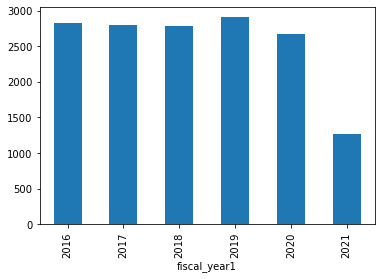

In [32]:
referral_by_year_bar.plot(x= 'child_id', y=['fiscal_year1'], kind = 'bar')

## Count of children with multiple referrals by POE

In [34]:
dups_count_df['child_id'].groupby(dups_count_df.POE).agg('count')

POE
ET    2837
FT    1530
GN    2775
MD    2550
NW     898
SC    1820
SE     946
SW     790
UC    1121
Name: child_id, dtype: int64

In [35]:
referral_by_poe_bar = dups_count_df['child_id'].groupby(dups_count_df.POE).agg('count')

AttributeError: 'AxesSubplot' object has no attribute 'write'

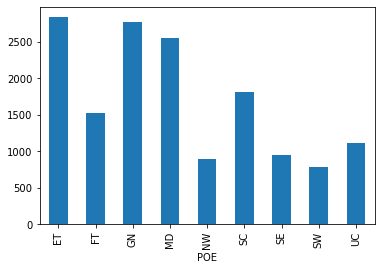

In [40]:
referral_poe_fig = referral_by_poe_bar.plot(x= 'child_id', y=['POE'], kind = 'bar')
plt.savefig(referral_poe_fig)

## END OF Q1